In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/gender_submission.csv
input/test.csv
input/train.csv


In [166]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [169]:
train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)

In [170]:
train_data.drop(columns=["Cabin"],inplace=True)
test_data.drop(columns=["Cabin"],inplace=True)

In [171]:
print(train_data["Embarked"].mode())
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0],inplace=True)

0    S
Name: Embarked, dtype: object


In [172]:
train_data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [173]:

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [174]:


features = ["Pclass", "Fare", "Age", "Parch", "Sex", "Embarked"]
X = train_data[features]
print(X)
y = train_data["Survived"]

     Pclass     Fare        Age  Parch  Sex  Embarked
0         3   7.2500  22.000000      0    1         2
1         1  71.2833  38.000000      0    0         0
2         3   7.9250  26.000000      0    0         2
3         1  53.1000  35.000000      0    0         2
4         3   8.0500  35.000000      0    1         2
..      ...      ...        ...    ...  ...       ...
886       2  13.0000  27.000000      0    1         2
887       1  30.0000  19.000000      0    0         2
888       3  23.4500  29.699118      2    0         2
889       1  30.0000  26.000000      0    1         0
890       3   7.7500  32.000000      0    1         1

[891 rows x 6 columns]


            Pclass      Fare       Age     Parch       Sex  Embarked
Pclass    1.000000 -0.549500 -0.331339  0.018443  0.131900  0.162098
Fare     -0.549500  1.000000  0.091566  0.216225 -0.182333 -0.224719
Age      -0.331339  0.091566  1.000000 -0.179191  0.084153 -0.026749
Parch     0.018443  0.216225 -0.179191  1.000000 -0.245489  0.039798
Sex       0.131900 -0.182333  0.084153 -0.245489  1.000000  0.108262
Embarked  0.162098 -0.224719 -0.026749  0.039798  0.108262  1.000000


<Axes: >

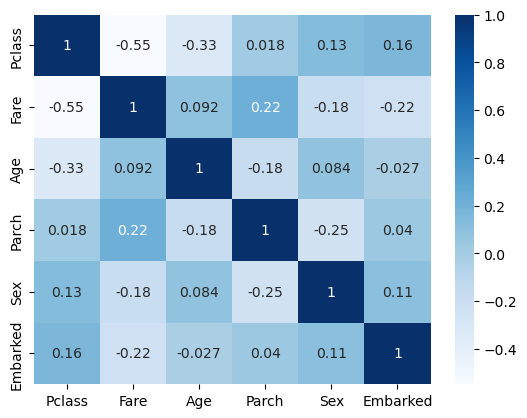

In [175]:
import seaborn as sb

corr = X.corr()
print(corr)
sb.heatmap(corr, cmap="Blues", annot=True)

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
rf_model=RandomForestClassifier(n_estimators=1000, max_depth = 3, random_state=1)
xgb_classifier = xgb.XGBClassifier(eta = 0.11)

xgb_classifier.fit(X_train, y_train)
rf_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=1)

In [178]:

y_pred_rf=rf_model.predict(X_test)


print(confusion_matrix(y_test,y_pred_rf))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_rf)))
print("Classification report: {}".format(classification_report(y_test,y_pred_rf)))

[[101   7]
 [ 24  47]]
Accuracy Score 0.8268156424581006
Classification report:               precision    recall  f1-score   support

           0       0.81      0.94      0.87       108
           1       0.87      0.66      0.75        71

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [179]:

y_pred_xg=xgb_classifier.predict(X_test)


print(confusion_matrix(y_test,y_pred_xg))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_xg)))
print("Classification report: {}".format(classification_report(y_test,y_pred_xg)))

[[97 11]
 [20 51]]
Accuracy Score 0.8268156424581006
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86       108
           1       0.82      0.72      0.77        71

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [180]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [181]:
test_data['Age'].fillna(value=test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(value=test_data['Fare'].mean(), inplace=True)

print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [182]:
print(features)
test_df = test_data[features]
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

test_df.head()

['Pclass', 'Fare', 'Age', 'Parch', 'Sex', 'Embarked']


C:\Users\hp\AppData\Local\Temp\ipykernel_27964\566357682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex'] = le.fit_transform(test_df['Sex'])
C:\Users\hp\AppData\Local\Temp\ipykernel_27964\566357682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Embarked'] = le.fit_transform(test_df['Embarked'])


,Pclass,Fare,Age,Parch,Sex,Embarked
0,3,7.8292,34.5,0,1,1
1,3,7.0000,47.0,0,0,2
2,2,9.6875,62.0,0,1,1
3,3,8.6625,27.0,0,1,2
4,3,12.2875,22.0,1,0,2


In [183]:
#test_df.drop(columns = ['Sex_female'], inplace = True)
test_df.head()

,Pclass,Fare,Age,Parch,Sex,Embarked
0,3,7.8292,34.5,0,1,1
1,3,7.0000,47.0,0,0,2
2,2,9.6875,62.0,0,1,1
3,3,8.6625,27.0,0,1,2
4,3,12.2875,22.0,1,0,2


In [184]:
predictions_rf = rf_model.predict(test_df)
predictions_xg = xgb_classifier.predict(test_df)
print(pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_rf}))
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_rf})
output.to_csv('submission.csv', index=False)
print(pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_xg}))
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_xg})
output.to_csv('submission_xg.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
Your submission was successfully saved!


In [185]:
test_truth = pd.read_csv("input/gender_submission.csv")
test_truth.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [186]:
test_truth.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [187]:
print("Accuracy rf:",metrics.accuracy_score(test_truth.Survived, predictions_rf))


Accuracy rf: 0.9354066985645934


In [188]:
print("Accuracy xg:",metrics.accuracy_score(test_truth.Survived, predictions_xg))

Accuracy xg: 0.8373205741626795
